# Image Stitcher
___
18 Jan, 2022 - PHS edit to include creating a stitched-image folder

12 Dec, 2022 - PHS edit to test BaSiC implementation (see first 3 code blocks)


**Fordyce Lab**, **2020**

In [1]:
%load_ext autoreload
%autoreload 2

from imagestitcher import stitcher
from imagestitcher import stitcherv3_BaSiC
import os
import shutil

In [16]:
## TEST STANDARD FF - does this still work with unedited code?

testfolder = '/Users/petersuzuki/Desktop/files/test_images_stitching'

stitcherv3_BaSiC.StitchingSettings.channels.update({'egfp','cy5'})

ffImagePath_egfp = '/Users/petersuzuki/Dropbox/PhD_Work/3_sharedProjects/activMutants/data/setup7/211206_FFcorrection_processedimages/MED_zyla_fluor_500ms_1.tif' # need a path to an image; won't actually be used for BaSiC
ffImagePath_cy5 = '/Users/petersuzuki/Dropbox/PhD_Work/3_sharedProjects/activMutants/data/setup7/211206_FFcorrection_processedimages/MED_zyla_acidblue9_500ms_1.tif' # need a path to an image; won't actually be used for BaSiC

settings = stitcherv3_BaSiC.StitchingSettings(
                                             ffPaths = {'egfp': ffImagePath_egfp,
                                                       'cy5': ffImagePath_cy5},
                                             ffParams = {'egfp':{500: (94, 29573)},
                                                       'cy5':{500: (94, 29573)}},
                                             setupNum = 7,
                                             tileDim = 1024
                                     )


p = stitcherv3_BaSiC.RasterParams(0.1, rotation = 0.35, autoFF = True)
stitcherv3_BaSiC.walkAndStitch(testfolder, p, stitchtype = 'single')

this is the stitcher in the dropbox
/Users/petersuzuki/Desktop/files/test_images_stitching/cy5/20220408-125204_220405_4blk_binding_step1_PostWash_Quant_cy5
completed standard FF correction
/Users/petersuzuki/Desktop/files/test_images_stitching/egfp/20220408-125204_220405_4blk_binding_step1_PostWash_Quant_egfp
completed standard FF correction


In [15]:
## TEST BaSiC FF
testfolder = '/Users/petersuzuki/Desktop/files/test_images_stitching'

stitcherv3_BaSiC.StitchingSettings.channels.update({'egfp','cy5'})

settings = stitcherv3_BaSiC.StitchingSettings(
                                             ffType = 'BaSiC',
                                             setupNum = 7,
                                             tileDim = 1024
                                             )


p = stitcherv3_BaSiC.RasterParams(0.1, rotation = 0.35, autoFF = True)
stitcherv3_BaSiC.walkAndStitch(testfolder, p, stitchtype = 'single')

this is the stitcher in the dropbox
/Users/petersuzuki/Desktop/files/test_images_stitching/cy5/20220408-125204_220405_4blk_binding_step1_PostWash_Quant_cy5
completed BaSiC FF correction
completed BaSiC FF correction
/Users/petersuzuki/Desktop/files/test_images_stitching/egfp/20220408-125204_220405_4blk_binding_step1_PostWash_Quant_egfp
completed BaSiC FF correction
completed BaSiC FF correction


<br>

## A. Define stitching settings

In [13]:
##### Define flat-field paths and parameters
mypath = '/Volumes/PHS_DATA/PHS data/MITOMI/211018_FFimages_setup7/211206_FFcorrection_processedimages/'
#ffImagePath = mypath+'MED_zyla_fluor_500ms_1.tif'
realImagePath = mypath+'AVG_zyla_dark_50ms_1_MMStack_Default.tif'

# params for old FF image (1x1 collected, converted to 2x2 bin in python)
ffImagePath = '/Volumes/PHS_DATA/PHS data/MITOMI/211018_FFimages_setup7/zyla_fluorescein_500ms_1_AVERAGED_2x2bin_darksub.tif'
setup_ffParams = {'egfp':{500: (399, 15641)}}

# params for new FF image (2x2 collected)
#ffImagePath = '/Volumes/PHS_DATA/PHS data/MITOMI/211018_FFimages_setup7/211206_FFcorrection_processedimages/MED_zyla_fluor_800ms_1.tif'
#setup_ffParams = {'egfp':{500: (94, 29573)}}

#setup_eGFP_ffPath = '../median_2x2_1000ms_eGFP_Zyla42.tiff'
#setup_ffParams = {'egfp':{500: (94, 29573)}}

settings = stitcher.StitchingSettings(ffPaths = {'egfp': ffImagePath},
                                        ffParams = setup_ffParams,
                                        setupNum= 7,
                                        tileDim = 1024
                                     )

ValueError: Error: The Flat-Field Image for egfp at /Volumes/PHS_DATA/PHS data/MITOMI/211018_FFimages_setup7/zyla_fluorescein_500ms_1_AVERAGED_2x2bin_darksub.tif does not exist

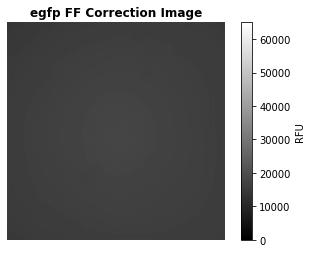

In [5]:
settings.showFFImages(vmin = 0, vmax = 65000)

<br>

## B. Stitch IPython Notebook images

In [7]:
stitcher.StitchingSettings.channels.update({'egfp','cy5'})
expfolder = '/Volumes/PHS_DATA/PHS data/MITOMI/220114_CRTFhit_805expressiontest'

In [19]:
# TEST
#expfolder = '/Volumes/PHS_DATA/PHS data/MITOMI/211206_CRTFhit_805expressiontest/'
expfolder = '/Volumes/PHS_DATA/PHS data/MITOMI/220114_CRTFhit_805expressiontest/'

p = stitcher.RasterParams(0.1, rotation = 0.35, autoFF = True)
stitcher.walkAndStitch(expfolder, p, stitchtype = 'single')

22-01-24 15:45:12 INFO     Stitching images | Ch: egfp, Exp: None, Overlap: 0.1, Rot: 0.35
22-01-24 15:45:14 INFO     Flat-Field Corrected Image | Ch: egfp, Exp: 500
22-01-24 15:45:15 INFO     Stitching images | Ch: egfp, Exp: None, Overlap: 0.1, Rot: 0.35
22-01-24 15:45:17 INFO     Flat-Field Corrected Image | Ch: egfp, Exp: 500
22-01-24 15:45:18 INFO     Stitching images | Ch: egfp, Exp: None, Overlap: 0.1, Rot: 0.35
22-01-24 15:45:20 INFO     Flat-Field Corrected Image | Ch: egfp, Exp: 500
22-01-24 15:45:21 INFO     Stitching images | Ch: egfp, Exp: None, Overlap: 0.1, Rot: 0.35
22-01-24 15:45:23 INFO     Flat-Field Corrected Image | Ch: egfp, Exp: 500
22-01-24 15:45:23 INFO     Stitching images | Ch: egfp, Exp: None, Overlap: 0.1, Rot: 0.35
22-01-24 15:45:26 INFO     Flat-Field Corrected Image | Ch: egfp, Exp: 500
22-01-24 15:45:26 INFO     Stitching images | Ch: egfp, Exp: None, Overlap: 0.1, Rot: 0.35
22-01-24 15:45:28 INFO     Flat-Field Corrected Image | Ch: egfp, Exp: 500
22-0

In [23]:
# traverse root directory, and list directories as dirs and files as files
# goal: move stitched images into single folder, named by root folder names 

#os.mkdir(expfolder + '/Stitched_Images_test')
for root, dirs, files in os.walk(expfolder):
    path = root.split(os.sep)
    print((len(path) - 1) * '---', os.path.basename(root))
    for file in files:
        if os.path.basename(root) == 'StitchedImages':
            if file.startswith('StitchedImg'):
                newname = str(path[-3] + '_' + file) # rename file
                shutil.copy('/'.join(path) + '/' + file, expfolder + '/Stitched_Images_test/' + newname) # copy file to new dir shutil.copy(old name, new name)
                print(newname)

------------------ 
------------------ 20220114-211458-d1_expression_0.5hr
--------------------- egfp
------------------------ 20220114-211458_expression_0.5hr_egfp
------------------------ StitchedImages
20220114-211458-d1_expression_0.5hr_StitchedImg_500_egfp_0.tif
------------------ 20220114-211645-d2_expression_0.5hr
--------------------- egfp
------------------------ 20220114-211645_expression_0.5hr_egfp
------------------------ StitchedImages
20220114-211645-d2_expression_0.5hr_StitchedImg_500_egfp_0.tif
------------------ 20220114-213102-d1_expression_0.5hr_postreflowd2
--------------------- egfp
------------------------ 20220114-213102_expression_0.5hr_postreflowd2_egfp
------------------------ StitchedImages
20220114-213102-d1_expression_0.5hr_postreflowd2_StitchedImg_500_egfp_0.tif
------------------ 20220114-213255-d2_expression_0.5hr_postreflowd2
--------------------- egfp
------------------------ 20220114-213255_expression_0.5hr_postreflowd2_egfp
------------------------ S

<br>

## C. Stitch Micro-Manager .ome.tiff images

In [4]:
root = '/stack-parent'

# Channel names from MicroManager configuration
channelExposureMap = {'3-GFP-B': 500, '5------': 100}

# Remap the names of the channels for saved filenames, if desired
channelRemap = {'3-GFP-B': '3-GFP-B', '5------': 'Cy5'}

p = stitcher.RasterParams(0.1, rotation = 0.0, autoFF = False)
stitcher.MMStitchStacks(root,
                        p,
                        channelExposureMap, 
                        channelRemap = channelRemap
                        )

<br>

## D. Background subtract

#### Store Background images

In [19]:
bg = stitcher.BackgroundImages()

#### Define paths and add to the backgrounds

In [20]:
# Reference Background Image
backgroundsRootD1 = '~/StitchedImg_500_4egfp_0.tif'
bg.add(backgroundsRootD1, 'd1', '4egfp', 500)

#### Define target and execute

In [2]:
target = '/root-path'
bg.walkAndBGSubtract(target, 'd1', '4egfp')